<a href="https://colab.research.google.com/github/ssinc21/Estudo-curso-Machine-Learning-de-A-Z/blob/main/machine_learning_classificacao_tras_panos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning Classificação Por Trás dos Panos

In [1]:
import pandas as pd
dados = pd.read_csv('/content/Customer-Churn.csv')

In [2]:
dados.shape

(7043, 18)

In [3]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [4]:
#modificação manual 
traducao_dic = {'Sim': 1,
                'Nao': 0}
dados_modificados = dados[['Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn']].replace(traducao_dic)
dados_modificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [5]:
# transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn'],
                                         axis=1))
#junção dos dados tranformados com os que já tinhamos
dados_final = pd.concat([dados_modificados, dummie_dados], axis=1)

In [6]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [7]:
dados_final.shape

(7043, 39)

In [8]:
pd.set_option('display.max_columns', 39)

In [9]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [10]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [11]:
# But, what's the Y maria? yh ill find it

##Dados desbalanceados

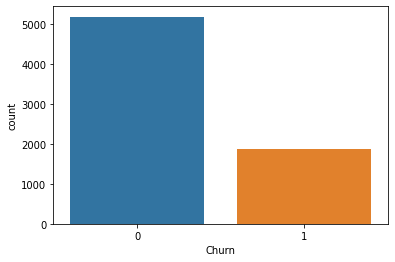

In [12]:
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data = dados_final)

###Balancear a amostra

In [13]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 6.0 MB/s 
     |████████████████████████████████| 199 kB 52.8 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [14]:
# Para podermos aplicar o SMOTE, devemos separar os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [15]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 123) # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X,y) # Realiza a reamostragem do conjunto de dados

In [16]:
dados_final = pd.concat([X,y], axis = 1) # Concatena a variável target (y) com as features (X)
# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


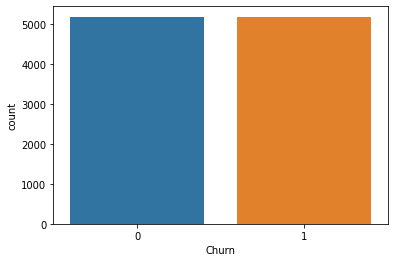

In [17]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

#Divisão em inputs e outputs

In [18]:
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [19]:
#biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

In [20]:
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

In [21]:
X_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.8149851 , -0.41334384,
       -1.10768354, -1.32176205, -0.88482108,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
       -0.44617598, -0.64211419,  0.87997069, -0.44617598, -0.52426638,
        1.18643645, -0.44617598, -0.77707385,  1.2033586 , -0.44617598,
       -0.78992399, -0.44648735,  0.73773107, -0.41989297, -0.42576817,
        1.30292044, -0.47943196, -0.43617215])

In [22]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.8149851 , -0.41334384,
        -1.14934709, -0.97235471,  1.13017199, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
         2.24126814, -0.64211419, -1.13640148,  2.24126814, -0.52426638,
         1.18643645, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26594459, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76750657, -0.47943196,  2.29267273]])

Distância Euclidiana

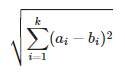

In [23]:
import numpy as np


In [24]:
a = Xmaria_normalizado
b = X_normalizado[0]

In [25]:
#começamos subtraindo
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.04166355,  0.34940734,  2.01499307, -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01637218,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03436608,  0.        ,
         2.05586858,  0.        , -2.09323857,  2.80145225,  0.        ,
        -2.07042701,  0.        ,  2.72884488]])

In [26]:
#depois elevamos a exponenciação
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73585140e-03, 1.22085486e-01, 4.06019707e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06575675e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13864535e+00, 0.00000000e+00, 4.22659561e+00, 0.00000000e+00,
        4.38164773e+00, 7.84813473e+00, 0.00000000e+00, 4.28666801e+00,
        0.00000000e+00, 7.44659439e+00]])

In [27]:
# realizamos a soma
np.sum(np.square(a-b))

91.70603225977928

In [28]:
#dai então tiramos a raiz e temos nossa distância
np.sqrt(np.sum(np.square(a-b)))

9.576326657950807

# Implementando o modelo

In [29]:
#biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

In [30]:
X_treino, X_teste,y_treino, y_teste = train_test_split(X_normalizado, y, test_size = 0.3, random_state = 123)

##Treino e teste

In [31]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [32]:
#instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos
knn = KNeighborsClassifier(metric = 'euclidean')

In [33]:
#treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [34]:
#testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)

In [35]:
#imprimindo o teste
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

In [36]:
#Calculando distância de Maria para os 10 primeiros 
import numpy as np
def calcula_distancia(dados_clientes,dados_maria, numero_clientes):
  distancias = []
  #loop para percorrer cliente por cliente
  for i in range(numero_clientes):
    dist1 = dados_maria - dados_clientes[i]
    soma_quadrado = np.sum(np.square(dist1))
    distancias.append(np.sqrt(soma_quadrado))
  return distancias

In [37]:
calcula_distancia(X_normalizado, Xmaria_normalizado, 5)

[9.576326657950807,
 9.16406548686776,
 8.496555129772961,
 10.037406936401425,
 7.80258342457135]

#Método Probabilistico 

In [38]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [39]:
#escolho utilizar mediana, porque é o valor central dos nossos dados ordenados
mediana = np.median(X_treino)

In [40]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [41]:
#criamos o modelo
bnb = BernoulliNB(binarize= mediana)

In [42]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=-0.4461759755508453)

In [43]:
predito_bnb = bnb.predict(X_teste)

In [44]:
predito_bnb

array([1, 0, 0, ..., 1, 1, 1])

##Árvores de decisão

In [45]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

In [46]:
#instanciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [47]:
#treinar o modelo
dtc.fit(X_treino,y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [48]:
#verificar a importância de cada atributo
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01987306, 0.01892071,
       0.16274644, 0.22207834, 0.00929414, 0.00344576, 0.01033768,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048744,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.01760111,
       0.02127213, 0.02182911, 0.01980513])

In [49]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [50]:
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

##Matriz de Confusão

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [52]:
print(confusion_matrix(y_teste,predito_knn))

[[1241  328]
 [ 247 1289]]


In [53]:
print(confusion_matrix(y_teste,predito_bnb))

[[1048  521]
 [ 242 1294]]


In [54]:
print(confusion_matrix(y_teste,predito_ArvoreDecisao))

[[1249  320]
 [ 277 1259]]


##Acurácia
A partir do calculo da matriz de confusão conseguimos inferir outras métricas, como por exemplo a acurária.

In [55]:
accuracy_score(y_teste, predito_knn)

0.8148148148148148

In [56]:
accuracy_score(y_teste, predito_bnb)  

0.75426731078905

In [57]:
accuracy_score(y_teste, predito_ArvoreDecisao)

0.8077294685990338

##Precisão
Outra métrica importante é a precisão, que calcula quantos foram classificados corretamento como positivos

In [58]:
from sklearn.metrics import precision_score

In [59]:
precision_score(y_teste, predito_knn)

0.7971552257266543

In [60]:
precision_score(y_teste, predito_bnb)

0.7129476584022039

In [61]:
precision_score(y_teste, predito_ArvoreDecisao)

0.7973400886637112

##Recall
Outra métrica importante é a Recall ou revocação ou ainda sensibilidade, que calcula o quão bom o modelo está para classificar corretamente um resultado positivo.

In [62]:
from sklearn.metrics import recall_score

In [63]:
recall_score(y_teste, predito_knn)

0.8391927083333334

In [64]:
recall_score(y_teste, predito_bnb)

0.8424479166666666

In [65]:
recall_score(y_teste, predito_ArvoreDecisao)

0.8196614583333334

##Escolhendo o Melhor Modelo

In [66]:
#Exemplo - análise das precisões calculadas anteriormente
print('Modelo KNN: ', precision_score(y_teste, predito_knn))
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_teste, predito_bnb))
print('Modelo Árvore de Decisão: ', precision_score(y_teste, predito_ArvoreDecisao))

Modelo KNN:  0.7971552257266543
Modelo Bernoulli de Naive Bayes:  0.7129476584022039
Modelo Árvore de Decisão:  0.7973400886637112
